In [1]:
## This cell just imports necessary modules
%pylab notebook
from sympy import sin, cos, exp, Function, Symbol, diff, integrate, solve
from mpl_toolkits import mplot3d

Populating the interactive namespace from numpy and matplotlib


# Vector calculus

## Scalar fields

Lecture 3, slide 3

Define a scalar field

In [2]:
# Create a mesh of 2D Cartesian coordinates, where -5 <= x <= 5 and -5 <= y <= 5
x = numpy.arange(-5., 5., 0.25)
y = numpy.arange(-5., 5., 0.25)
X, Y = numpy.meshgrid(x, y)

# Computes the value of the scalar field at each (x,y) coordinate, and stores it in Z.
f = 16 - 2*(X**2) - Y**2 + X*Y

Plot a contour plot of the scalar field $h(x,y)=16-2x^{2}-y^{2}+xy$ using pylab

<IPython.core.display.Javascript object>


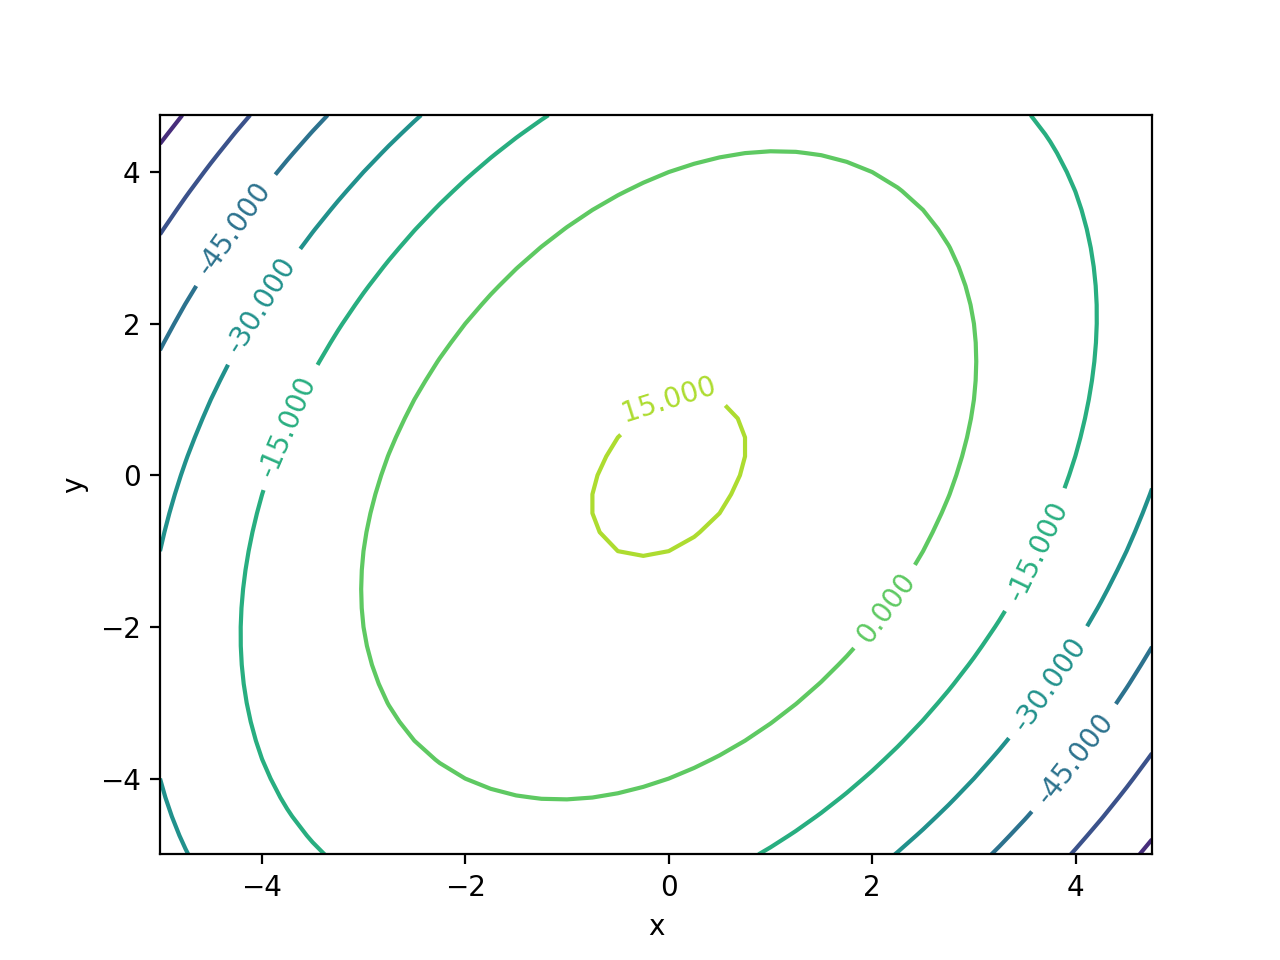

Text(0, 0.5, 'y')

In [3]:
fig = pylab.figure()
contour_plot = pylab.contour(X, Y, f)
pylab.clabel(contour_plot, inline=1)
pylab.xlabel("x")
pylab.ylabel("y")

Plot a surface plot of the scalar field $h(x,y)=16-2x^{2}-y^{2}+xy$ using pylab

<IPython.core.display.Javascript object>


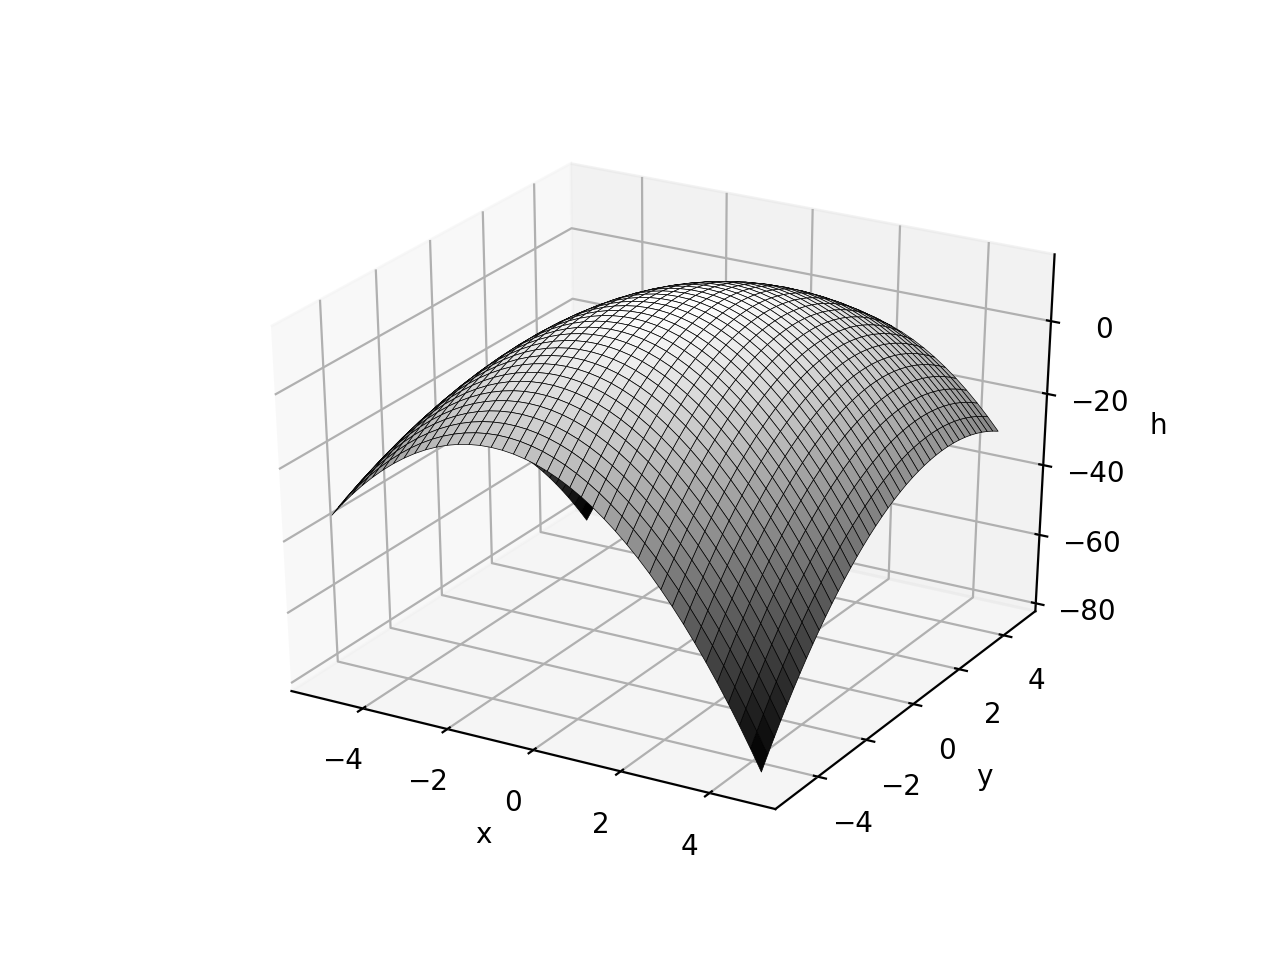

Text(0.5, 0, 'h')

In [4]:
fig = pylab.figure()
ax = pylab.axes(projection='3d')
ax.plot_surface(X, Y, f, cmap='gray', edgecolor = 'k', lw=0.25)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("h")

Plot the surface and contour plot of the scalar field $h(x,y)=16-2x^{2}-y^{2}+xy$ using pylab

<IPython.core.display.Javascript object>


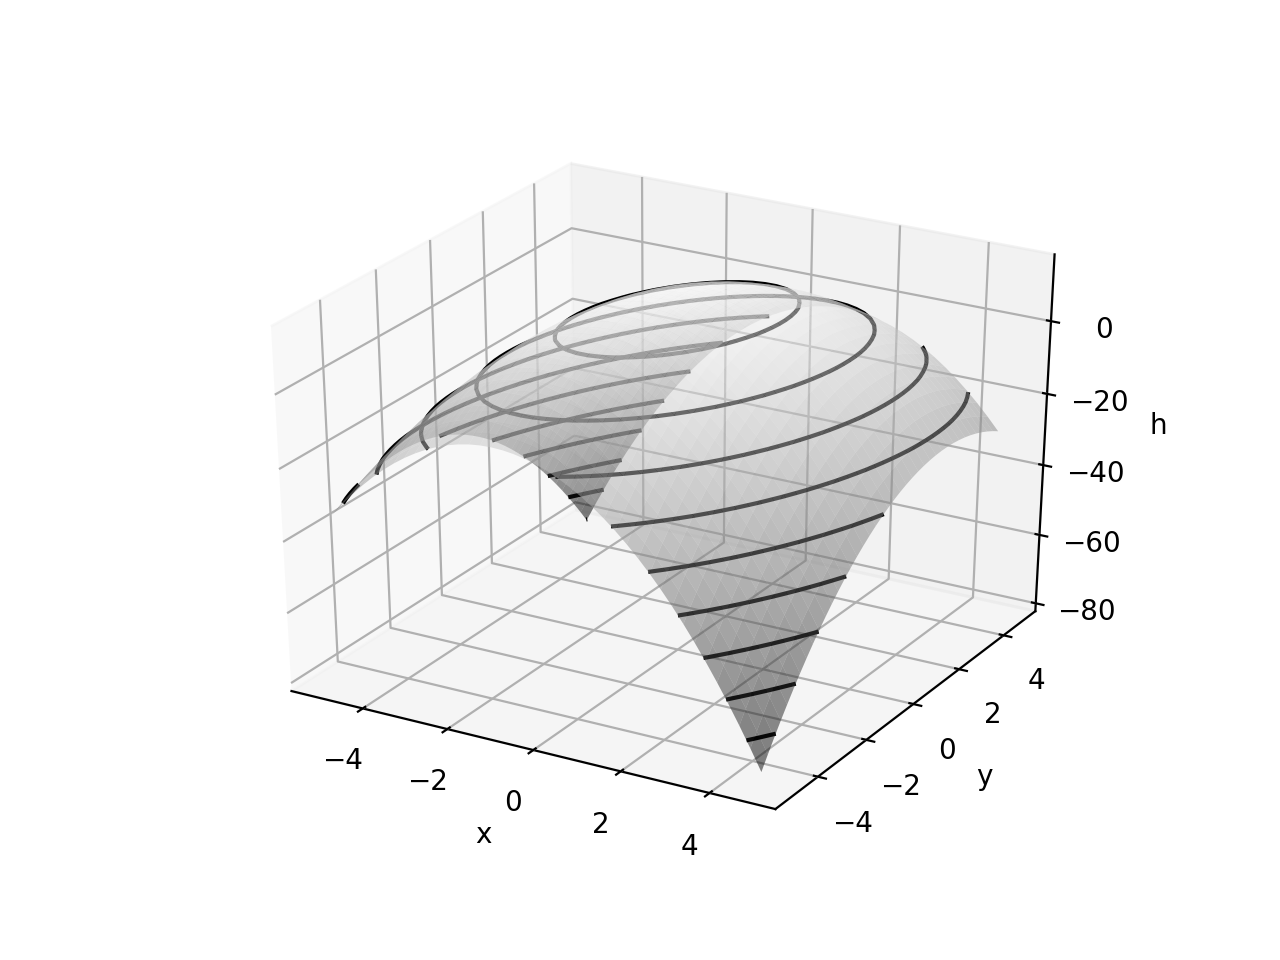

Text(0.5, 0, 'h')

In [5]:
fig = pylab.figure()
ax = pylab.axes(projection='3d')
ax.contour3D(X, Y, f, 10, colors = 'k', linestyles='-')
ax.plot_surface(X, Y, f, cmap='gray', alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("h")

## Vector fields

Lecture 3, slide 4

Define a vector field, and plot the vector field $v=[-x^2, -y^2]$ on a quiver plot using pylab.quiver

<IPython.core.display.Javascript object>


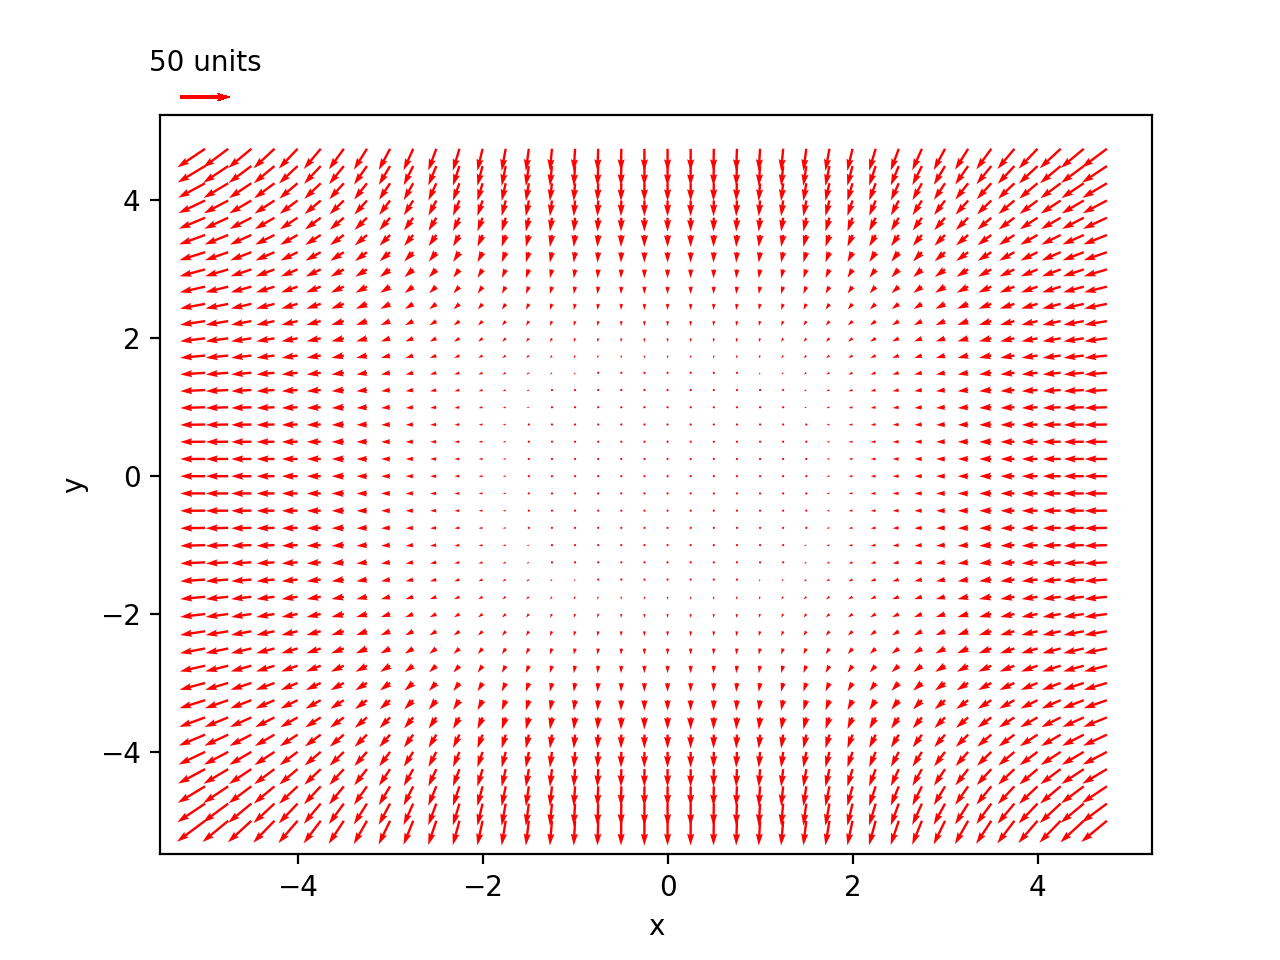

Text(0, 0.5, 'y')

In [6]:
# Create a mesh of 2D Cartesian coordinates, where -5 <= x <= 5 and -5 <= y <= 5
x = numpy.arange(-5.0, 5.0, 0.25)
y = numpy.arange(-5.0, 5.0, 0.25)
X, Y = numpy.meshgrid(x, y)

# Computes the value of the vector field at each (x,y) coordinate.
# Z1 and Z2 hold the i and j component of the vector field respectively.
Z1 = -(X**2)
Z2 = -(Y**2)

fig = pylab.figure()
plt = pylab.quiver(X,Y,Z1,Z2,angles='xy',scale=1000,color='r')
pylab.quiverkey(plt,-5,5.5,50,"50 units",coordinates='data',color='r')
pylab.xlabel("x")
pylab.ylabel("y")

## Gradients

Lecture 3, slide 6

Computing the gradient on scalar field using sympy.diff, and finding where gradient=0 using sympy.solve 

In [7]:
# Define the independent variables using Symbol
x = Symbol('x')
y = Symbol('y')
# Define the function f(x,y)
f = 16 - 2*(x**2) - y**2 + x*y

# The gradient of f (a scalar field) is a vector field:
grad_f = [diff(f,x), diff(f,y)]
print("The gradient of the scalar field f(x,y) = 16 - 2*(x**2) - y**2 + x*y is: ")
print(grad_f)

print("The point where the gradient is zero is: ")
# We solve a simultaneous equation such that grad_f[0] == 0 and grad_f[1] == 0
print(solve([grad_f[0], grad_f[1]], [x, y]))

The gradient of the scalar field f(x,y) = 16 - 2*(x**2) - y**2 + x*y is: 
[-4*x + y, x - 2*y]
The point where the gradient is zero is: 
{y: 0, x: 0}


Quiver plot of the gradient of the scalar field.

Gradient $v=[-4x+y, x-2y]$

<IPython.core.display.Javascript object>


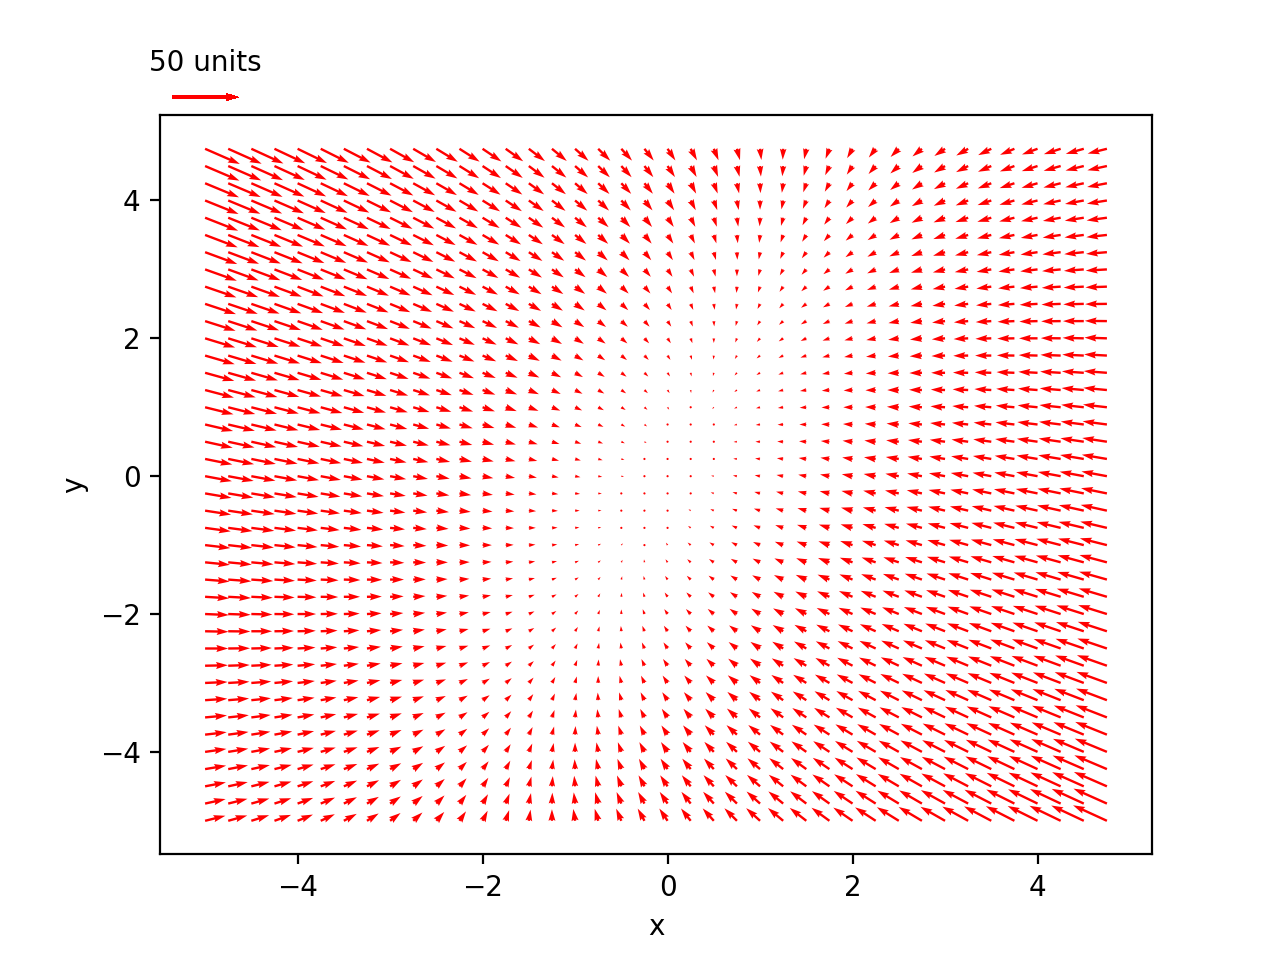

Text(0, 0.5, 'y')

In [8]:
x = numpy.arange(-5., 5., 0.25)
y = numpy.arange(-5., 5., 0.25)
X, Y = numpy.meshgrid(x, y)

Z1 = -4*X + Y
Z2 = X - 2*Y

fig = pylab.figure()
plt = pylab.quiver(X,Y,Z1,Z2,angles='xy',scale=750,color='r')
pylab.quiverkey(plt,-5,5.5,50,"50 units",coordinates='data',color='r')
pylab.xlabel("x")
pylab.ylabel("y")

## Directional derivatives

Lecture 3, slide 12

Computing the gradient of a scalar field using sympy.diff, the gradient at a specific point using evalf, and the gradient at a specific point towards the direction of a unit vector using numpy.dot

In [9]:
# Define the independent variables using Symbol
x = Symbol('x')
y = Symbol('y')
# Define the function h(x,y)
h = 3*x*(y**2)

# The gradient of h
grad_h = [diff(h,x), diff(h,y)]
print("The gradient of h(x,y) = 3*x*(y**2) is: ")
print(grad_h, "\n")

print("At the point (1,2), the gradient is: ")
# Use evalf to evaluate a function, with subs to substitute in specific values for x and y
grad_h_at_point = [grad_h[0].evalf(subs={x:1, y:2}), grad_h[1].evalf(subs={x:1, y:2})]
print(grad_h_at_point, "\n")

# Find the unit vector in the direction 3i + 4j
a = numpy.array([3, 4])
a_magnitude = numpy.linalg.norm(a, ord=2)
unit_a = a/a_magnitude

print("The unit vector in the direction 3i + 4j is:")
print(unit_a, "\n")

# Dot product to get the directional derivative 
# (i.e. the gradient of h in the direction of the vector unit_a)
slope = numpy.dot(grad_h_at_point, unit_a)
print("The slope of h in the direction ", unit_a, " at (1,2) is: ", slope)

The gradient of h(x,y) = 3*x*(y**2) is: 
[3*y**2, 6*x*y] 

At the point (1,2), the gradient is: 
[12.0000000000000, 12.0000000000000] 

The unit vector in the direction 3i + 4j is:
[0.6 0.8] 

The slope of h in the direction  [0.6 0.8]  at (1,2) is:  16.8000000000000


Surface plot of $h(x,y)=3xy^2$

<IPython.core.display.Javascript object>


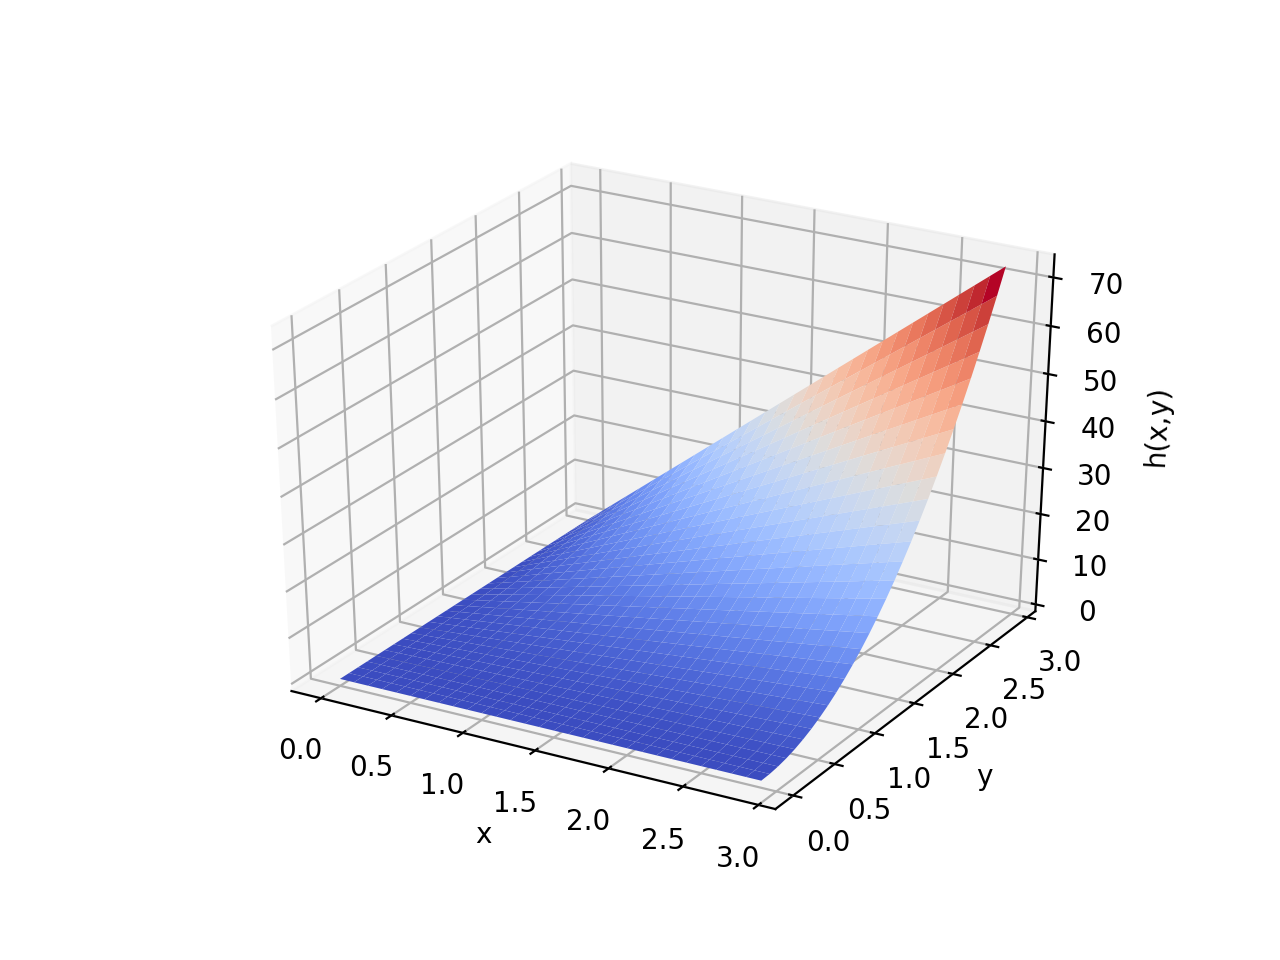

Text(0.5, 0, 'h(x,y)')

In [10]:
# Create a mesh of 2D Cartesian coordinates, where -5 <= x <= 5 and -5 <= y <= 5
x = numpy.arange(0., 3., 0.1)
y = numpy.arange(0., 3., 0.1)
X, Y = numpy.meshgrid(x, y)
h = 3 * X * Y**2

fig = pylab.figure()
ax = pylab.axes(projection='3d')
ax.plot_surface(X, Y, h, cmap=cm.coolwarm, edgecolor = 'none', lw=0.25)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("h(x,y)")

## Divergence

Lecture 3, slide 15

Computing divergence of a vector field using sympy.diff

In [12]:
# Define the independent variables using Symbol
x = Symbol('x')
y = Symbol('y')
# Define the vector field v(x,y)
v = [-(x**2), -(y**2)]

# Compute the divergence using diff. 

divergence = diff(v[0],x) + diff(v[1],y)
print("The divergence of the vector field ", v, " is: ")
print(divergence)

The divergence of the vector field  [-x**2, -y**2]  is: 
-2*x - 2*y


```{note}
NOTE 1: A neater way would be to use SymPy's dot function. However, there doesn't seem to be a way of defining a gradient vector in SymPy without specifying the function we wish to operate on, so we'll compute the divergence the long way.

NOTE 2: this is the dot product of the gradient vector and v, which will always result in a scalar. d/dx is applied to the first component of v (i.e. v[0]), d/dy is applied to the second component of v (i.e. v[1])
```

Surface plot of the divergence of the vector field.

Divergence $h(x,y)=-2x-2y$

<IPython.core.display.Javascript object>


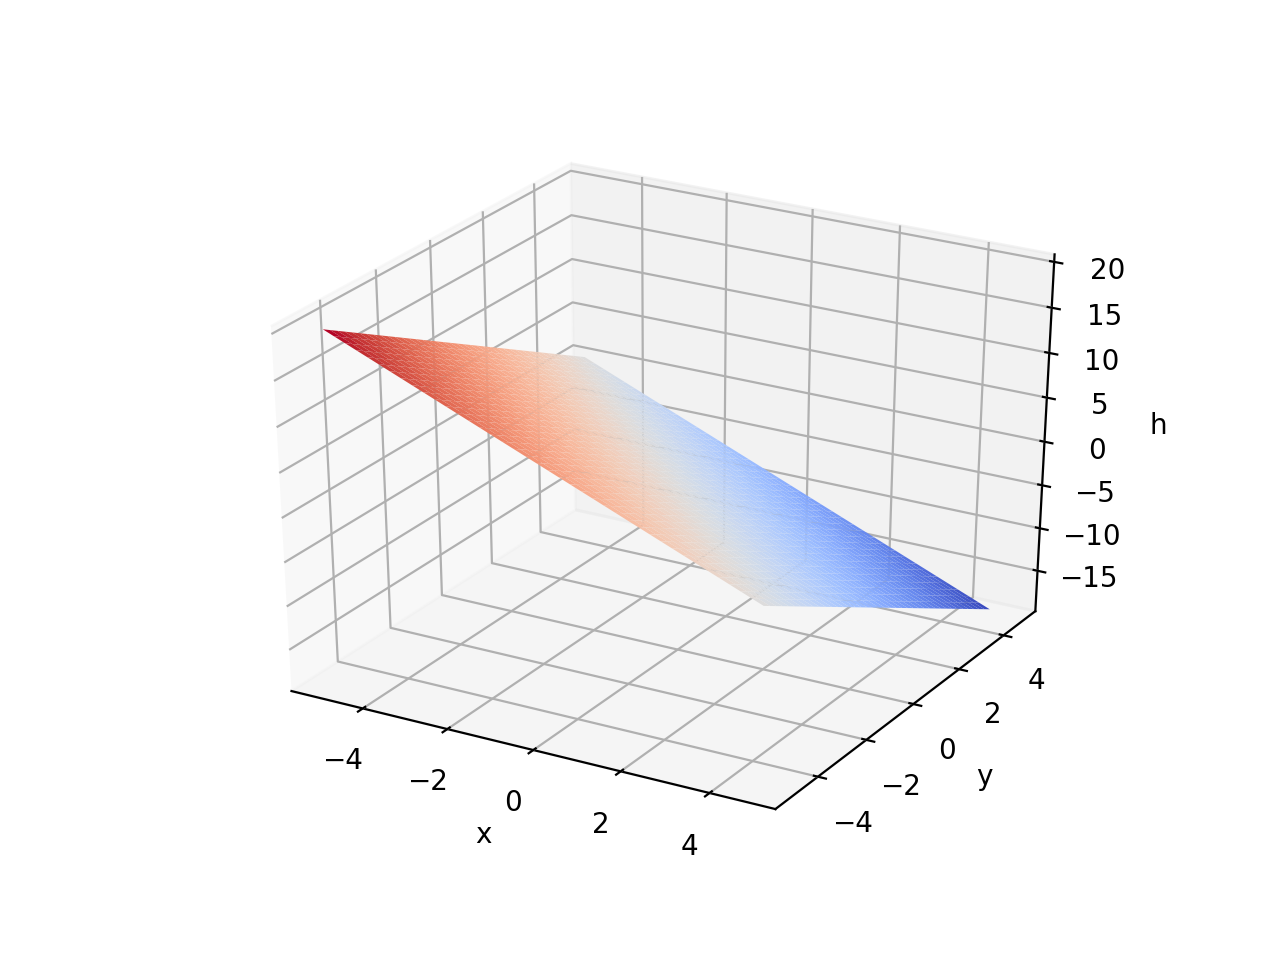

Text(0.5, 0, 'h')

In [13]:
# Create a mesh of 2D Cartesian coordinates, where -5 <= x <= 5 and -5 <= y <= 5
x = numpy.arange(-5., 5., 0.25)
y = numpy.arange(-5., 5., 0.25)
X, Y = numpy.meshgrid(x, y)

h = -2 * X - 2 * Y

fig = pylab.figure()
ax = pylab.axes(projection='3d')
ax.plot_surface(X, Y, h, cmap=cm.coolwarm, edgecolor = 'none', lw=0.25)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("h")

## Curl

Lecture 3, slide 19

Compute the curl of a vector field using sympy.diff, and the curl at a specific point using evalf

In [14]:
# Define the independent variables using Symbol
x = Symbol('x')
y = Symbol('y')
# Define the vector field v(x,y)
v = [cos(pi*y), -cos(pi*x)]

# Compute the curl using diff.
# Remember: the curl of a vector always results in another vector.
# The first two components of the curl are zero because v has a zero k-component.
curl = [0, 0, diff(v[1], x) - diff(v[0], y)]
print("The curl of the vector field ", v, " is: ")
print(curl)
print()
print("At the point (0, -0.5), the curl is: ")
print([0, 0, curl[2].evalf(subs={x:0, y:-0.5})])

The curl of the vector field  [cos(3.14159265358979*y), -cos(3.14159265358979*x)]  is: 
[0, 0, 3.14159265358979*sin(3.14159265358979*x) + 3.14159265358979*sin(3.14159265358979*y)]

At the point (0, -0.5), the curl is: 
[0, 0, -3.14159265358979]


Quiver plot of vector field $v=[\cos(\pi y), -\cos(\pi x)]$

<IPython.core.display.Javascript object>


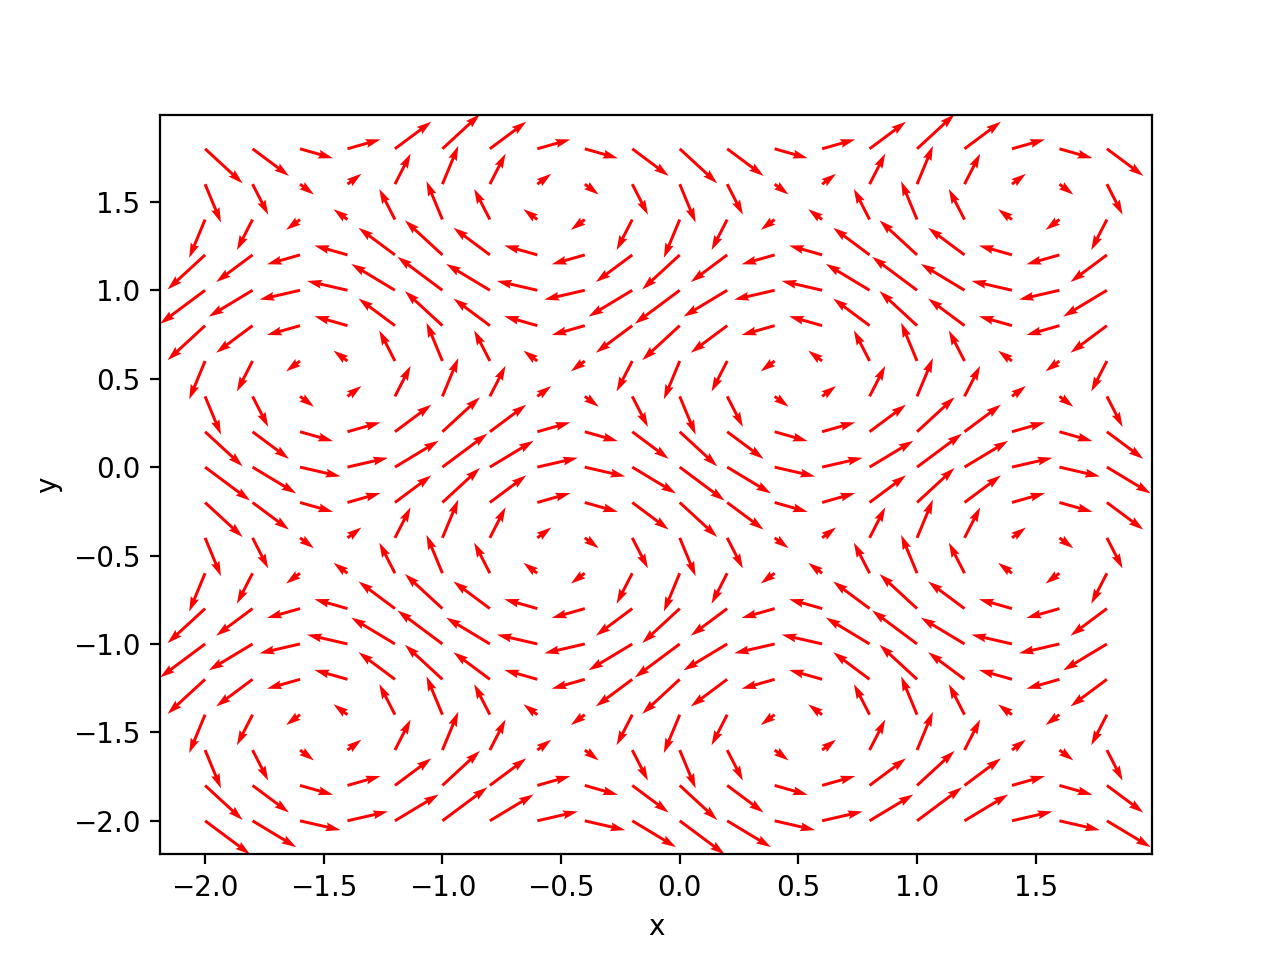

Text(0, 0.5, 'y')

In [15]:
x = numpy.arange(-2., 2., 0.2)
y = numpy.arange(-2., 2., 0.2)
X, Y = numpy.meshgrid(x, y)

# Computes the value of the vector field at each (x,y) coordinate.
# Z1 and Z2 hold the i and j component of the vector field respectively.
Z1 = numpy.cos(pi*Y)
Z2 = -numpy.cos(pi*X)

fig = pylab.figure()
plt = pylab.quiver(X,Y,Z1,Z2,angles='xy',scale=25,color='r')
pylab.xlabel("x")
pylab.ylabel("y")

Surface plot of the magnitude of z of the vector field.

Curl $v=[0, 0, \pi \sin(\pi x)+\pi \sin(\pi y)]$

<IPython.core.display.Javascript object>


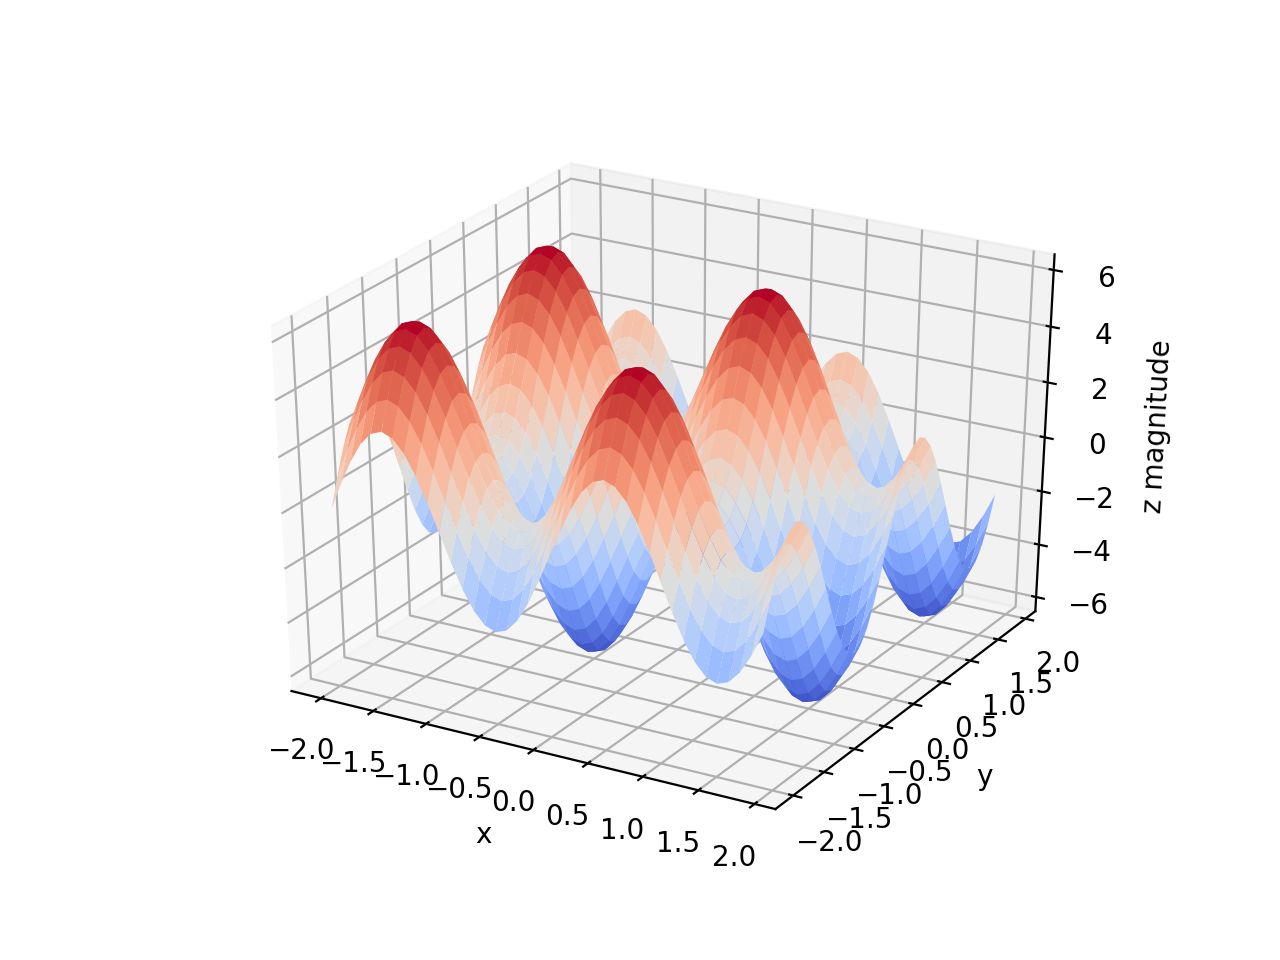

Text(0.5, 0, 'z magnitude')

In [16]:
x = numpy.arange(-2, 2, 0.1)
y = numpy.arange(-2, 2, 0.1)
X, Y = numpy.meshgrid(x, y)

Z = pi*numpy.sin(pi*X) + pi*numpy.sin(pi*Y)

fig = pylab.figure()
ax = pylab.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, edgecolor = 'none', lw=0.25)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z magnitude")

## Laplacian

Lecture 3, slide 22

Compute Laplacian of a scalar field using sympy.diff

In [17]:
# Define the independent variables using Symbol
x = Symbol('x')
y = Symbol('y')
# Define the scalar field f(x,y)
f = x*y + 3*exp(x*y)

# In SymPy we can specify the order of the derivative as an optional argument
# (in this case, it is '2' to get the second derivative).
print("The Laplacian of ", f, " is: ")
laplacian = diff(f, x, 2) + diff(f, y, 2)
print(laplacian)

The Laplacian of  x*y + 3*exp(x*y)  is: 
3*x**2*exp(x*y) + 3*y**2*exp(x*y)


Surface plot of scalar field $h(x,y)=xy+3\exp(xy)$

<IPython.core.display.Javascript object>


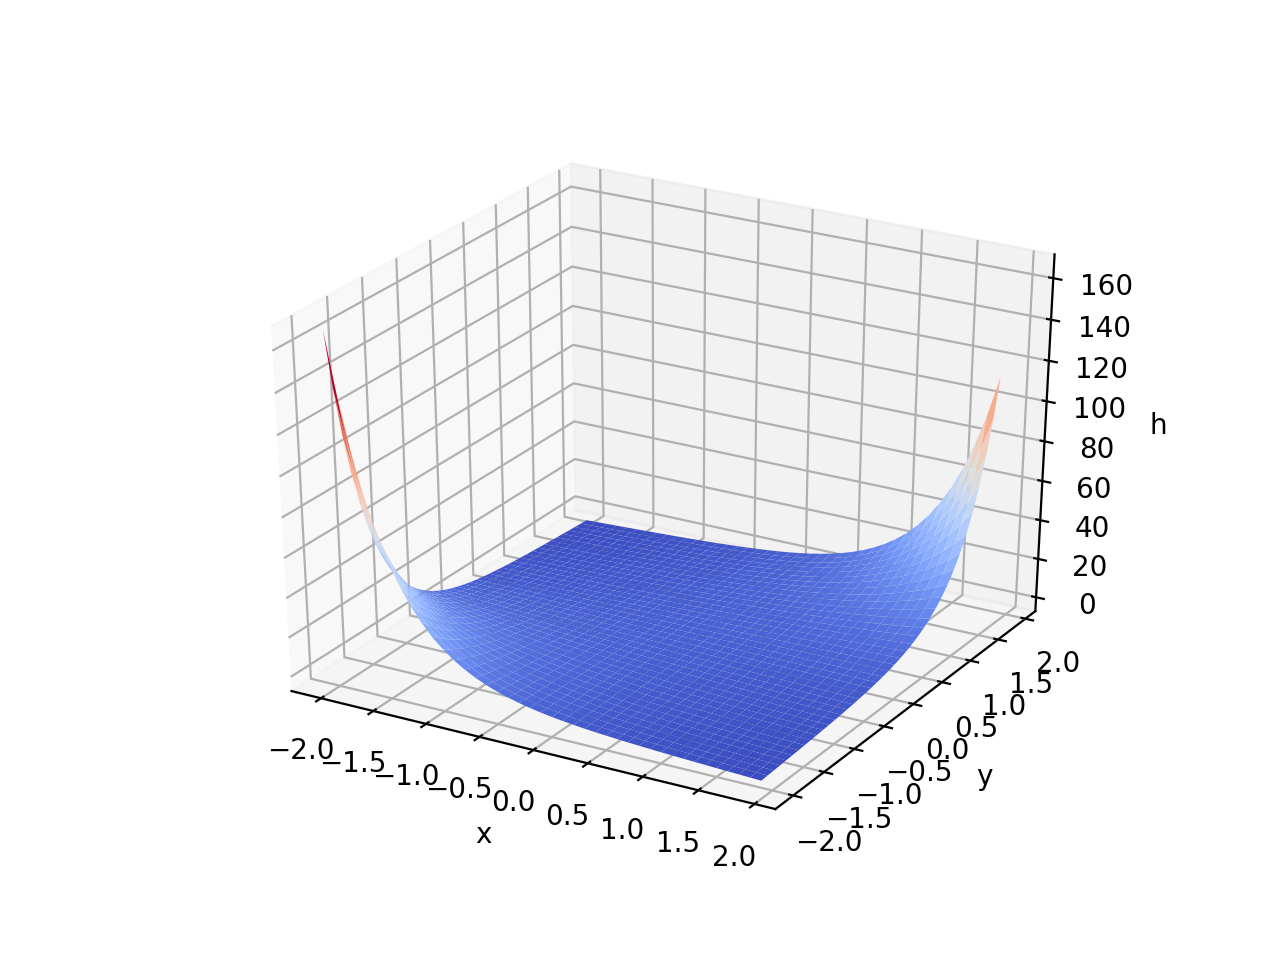

Text(0.5, 0, 'h')

In [18]:
x = numpy.arange(-2, 2, 0.1)
y = numpy.arange(-2, 2, 0.1)
X, Y = numpy.meshgrid(x, y)

h = X * Y + 3 * numpy.exp(X*Y)

fig = pylab.figure()
ax = pylab.axes(projection='3d')
ax.plot_surface(X, Y, h, cmap=cm.coolwarm, edgecolor = 'none', lw=0.25)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("h")

Surface plot of Laplacian of scalar field. $$\Delta h(x,y)=3x^2\exp(xy)+3y^2\exp(xy)$$

<IPython.core.display.Javascript object>


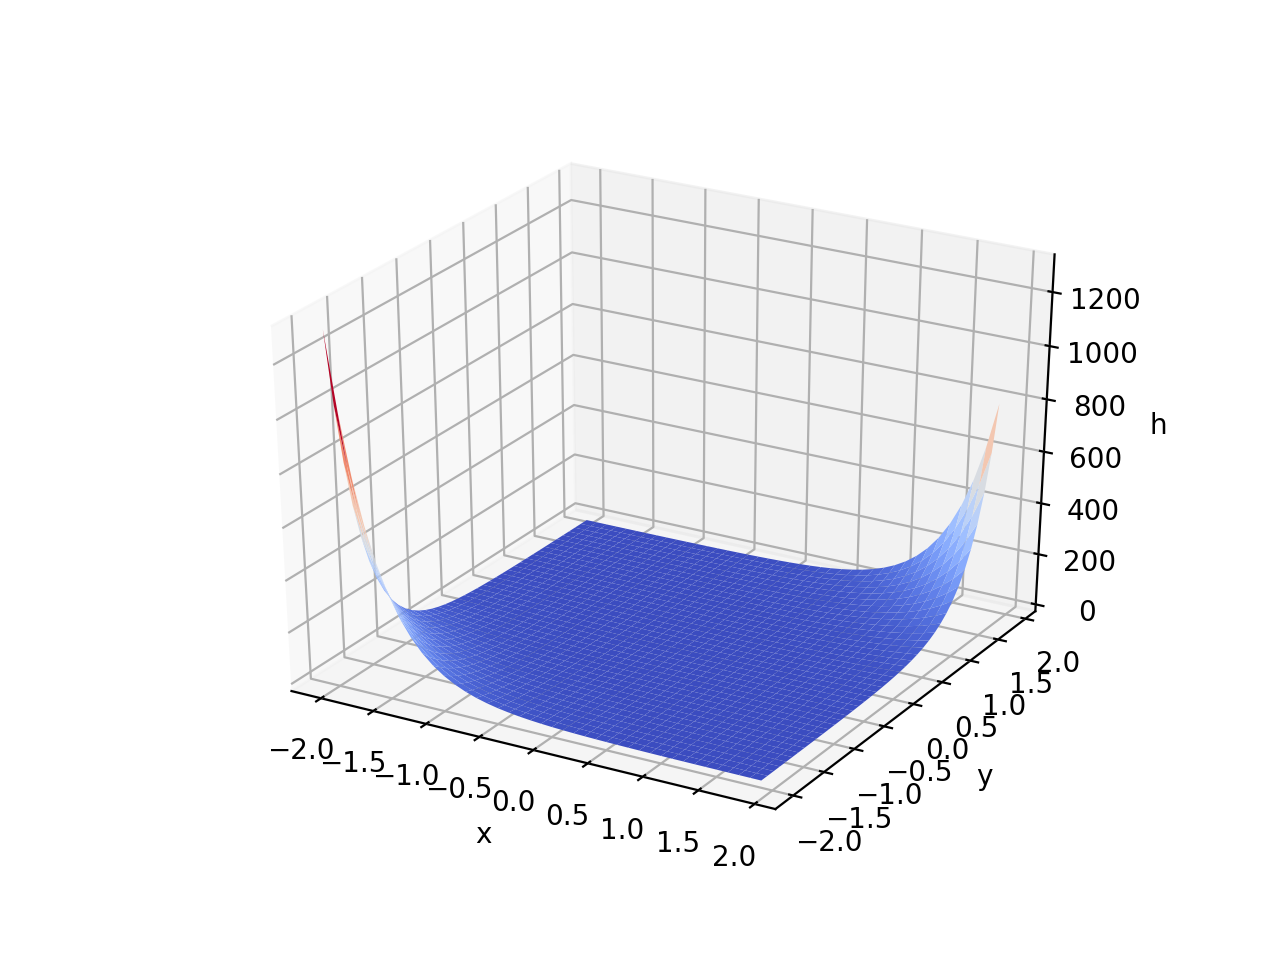

Text(0.5, 0, 'h')

In [19]:
x = numpy.arange(-2, 2, 0.1)
y = numpy.arange(-2, 2, 0.1)
X, Y = numpy.meshgrid(x, y)

h = 3*X**2*numpy.exp(X*Y) + 3*Y**2*numpy.exp(X*Y)

fig = pylab.figure()
ax = pylab.axes(projection='3d')
ax.plot_surface(X, Y, h, cmap=cm.coolwarm, edgecolor = 'none', lw=0.25)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("h")